In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
import sklearn #Для стандартизации
from sklearn import preprocessing

In [2]:
df = pd.read_excel(r'C:\Users\Mln\jupyter-lab\random_test\mindset\task\Задача.xlsx')

print(df.head())

   Персона  Возраст, лет  Стаж вождения, лет  Убыточность, %  \
0  6-LLJEH            20                   1             263   
1  2-GLHFG            74                  51             107   
2  6-FJFKL            27                   1             165   
3  4-KJEJL            24                   6             348   
4  5-JFFGH            26                   3             286   

   Уровень заработной платы, руб/год  
0                             716693  
1                             274393  
2                             723841  
3                             139419  
4                             650003  


In [3]:
df = df.drop(['Персона'], axis=1) # удаляю признаки которые не буду рассматривать

## Шкалировка

In [6]:
df_scal = df.copy()
col = ['Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %', 'Уровень заработной платы, руб/год'] # отбираю количественные признаки

features = df_scal[col] # df только с колич. признаками

scaler = QuantileTransformer(n_quantiles=10, random_state=42).fit(features.values) # вызываем и обучаю шкалировщик
features = scaler.transform(features.values) # преобразуем датафрейм с колич. признаками

df_scal[col] = features # возращаю наши данные в исходный датафрейм

s_scaler = preprocessing.MinMaxScaler()
df_s = s_scaler.fit_transform(df)
col_names = list(df.columns)# Копируем названия столбцов, которые теряются при использовании fit_transform()
df_s

to_predict = np.array([343.0, 43543532.0]).reshape(1,2)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

df_s = pd.DataFrame(df_s, columns = col_names)
df_s

x = df_s[['Убыточность, %', 'Уровень заработной платы, руб/год']]
model = KMeans(n_clusters=3, init='k-means++')
model.fit(x)
y_predicted = model.fit_predict(x) # предсказываю значения
df_s['cluster'] = y_predicted #добовляю новую колонку в датафрейм
df_s

sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,1], data=df_s, hue=df_s['cluster']) # строю график с классами

sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], color='red') # добавляю на график центроиды

plt.title('Кластеризация признаков: Убыточность, % и Уровень заработной платы, руб/год'.format(x))

plt.legend()
plt.show()

## Model building

In [7]:
df_k = df_scal.copy()

In [8]:
x = df_k[['Убыточность, %', 'Уровень заработной платы, руб/год']]

In [10]:
model = KMeans(n_clusters=3, init='k-means++')
model.fit(x)

KMeans(n_clusters=3)

In [11]:
y_predicted = model.fit_predict(x) # предсказываю значения

In [12]:
df_k['cluster'] = y_predicted #добовляю новую колонку в датафрейм
df_k

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
0,0.000000,0.000000,0.683386,0.645358,0
1,0.930556,0.929293,0.271111,0.445600,0
2,0.277778,0.000000,0.476703,0.654409,0
3,0.148148,0.333333,0.772205,0.082716,2
4,0.222222,0.166667,0.707419,0.560917,0
...,...,...,...,...,...
479,0.800000,0.641026,0.248889,0.958394,1
480,0.800000,0.841270,0.559259,0.343090,0
481,0.000000,0.277778,0.706374,0.548558,0
482,0.564815,0.746032,0.129129,0.955727,1


In [13]:
df_k['cluster'] = df_k['cluster'].astype(object) #change the data type
df_k

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
0,0.000000,0.000000,0.683386,0.645358,0
1,0.930556,0.929293,0.271111,0.445600,0
2,0.277778,0.000000,0.476703,0.654409,0
3,0.148148,0.333333,0.772205,0.082716,2
4,0.222222,0.166667,0.707419,0.560917,0
...,...,...,...,...,...
479,0.800000,0.641026,0.248889,0.958394,1
480,0.800000,0.841270,0.559259,0.343090,0
481,0.000000,0.277778,0.706374,0.548558,0
482,0.564815,0.746032,0.129129,0.955727,1


In [14]:
df_k['cluster'].unique()

array([0, 2, 1], dtype=object)

In [15]:
X = x.values

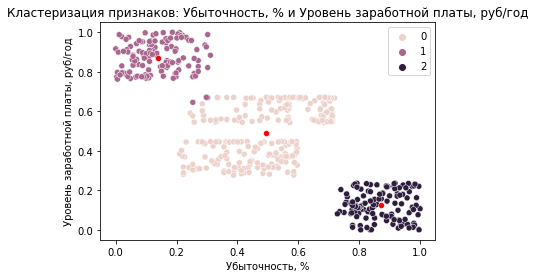

In [16]:
sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,1], data=df_k, hue=df_k['cluster']) # строю график с классами

sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], color='red') # добавляю на график центроиды

plt.title('Кластеризация признаков: Убыточность, % и Уровень заработной платы, руб/год'.format(x))

plt.legend()
plt.show()

In [17]:
output = pd.DataFrame(data=y_predicted) # создаю датафрейм с предсказанными классами
output[0].value_counts(ascending=False) #количество наблюдений в каждом классе

0    238
1    125
2    121
Name: 0, dtype: int64

In [20]:
df_l = df
df_l

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,20,1,263,716693
1,74,51,107,274393
2,27,1,165,723841
3,24,6,348,139419
4,26,3,286,650003
...,...,...,...,...
479,67,31,102,3630438
480,67,44,189,232022
481,20,5,285,622134
482,49,38,65,3607848


In [26]:
df_l['Кластер'] = model.labels_.astype(object)
df_l.head(20)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",Кластер
0,20,1,263,716693,0
1,74,51,107,274393,0
2,27,1,165,723841,0
3,24,6,348,139419,2
4,26,3,286,650003,0
5,77,56,180,223249,0
6,35,10,552,179863,2
7,28,3,181,784904,0
8,76,55,179,243535,0
9,47,32,107,2596468,1


In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # убираем в выводе экспоненту
df_l.groupby('Кластер')[['Убыточность, %', 'Уровень заработной платы, руб/год']].mean()

,"Убыточность, %","Уровень заработной платы, руб/год"
Кластер,,
0,178.828,466744.504
1,67.192,2907951.656
2,487.140,149461.620


На основе предложенных данных видно, что убыточность зависит от уровня заработной платы в год. 
Чем выше уровень заработной платы, тем меньше показатель убыточности и наоборот, чем ниже зарплата у персоны, тем выше показатель убыточности. 

Данные разбиты на три кластера: 
1. Люди в средним годовым доходом
2. Люди с высоким годовым доходом
3. Люди с низким годовым доходом

Нулевой кластер - люди с высоким годовым доходом, средняя убыточность в этом кластере составляет 67.192%, а среднее число годовой запралаты 2907951.656 рублей. 
Предполагаю, что люди с высоким годовым доходом проводят меньше времени на дорогах общего пользования, поэтому этот кластер обладает самым низким показателем убыточности.

Первый кластер - люди с низким годовым доходом, средняя убыточность в этом кластере составляет 487.140%, а среднее число годовой запралаты 149461.620 рублей. 
Могу предположить почему люди с низким годовым доходом имеют высокие показатели убыточности. Допустим, рассмотрим водителя курьера или же водителя маршрутных транспротных средств, при такой работе: частое взаимодействие с авто или другим видом транспортного средства, возрастает значение риска попасть в ДТП, скорее всего это и проявляется в высоком показателе убыточности.

Второй кластер - люди со средним годовым доходом, средняя убыточность в этом кластере составляет 178.828%, а среднее число годовой запралаты 466744.504 рублей, что почти в два раза больше годовой зарплаты людей из третьего кластера.

In [25]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))